In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from wordcloud import WordCloud
import spacy

In [ ]:
bible=pd.read_csv("https://raw.githubusercontent.com/Jcharis/Bible-NLP-and-ML-using-Python/master/kjv_cleandata.csv")

In [ ]:
bible.head()

,Unnamed: 0,id,book,chapter,verse,text
0,0,1001001,Genesis,1,1,In the beginning God created the heaven and th...
1,1,1001002,Genesis,1,2,"And the earth was without form, and void; and ..."
2,2,1001003,Genesis,1,3,"And God said, Let there be light: and there wa..."
3,3,1001004,Genesis,1,4,"And God saw the light, that it was good: and G..."
4,4,1001005,Genesis,1,5,"And God called the light Day, and the darkness..."


In [ ]:
bible.tail()

,Unnamed: 0,id,book,chapter,verse,text
31098,31098,66022017,Revelation,22,17,"And the Spirit and the bride say, Come. And le..."
31099,31099,66022018,Revelation,22,18,For I testify unto every man that heareth the ...
31100,31100,66022019,Revelation,22,19,And if any man shall take away from the words ...
31101,31101,66022020,Revelation,22,20,"He which testifieth these things saith, Surely..."
31102,31102,66022021,Revelation,22,21,The grace of our Lord Jesus Christ be with you...


In [ ]:
bible.shape

(31103, 6)

In [ ]:
bible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31103 entries, 0 to 31102
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  31103 non-null  int64 
 1   id          31103 non-null  int64 
 2   book        31103 non-null  object
 3   chapter     31103 non-null  int64 
 4   verse       31103 non-null  int64 
 5   text        31103 non-null  object
dtypes: int64(4), object(2)
memory usage: 1.4+ MB


In [ ]:
bible.describe()

,Unnamed: 0,id,chapter,verse
count,31103.000000,3.110300e+04,31103.000000,31103.000000
mean,15551.000000,2.251812e+07,20.630614,17.043308
std,8978.807048,1.649304e+07,23.408329,14.075084
min,0.000000,1.001001e+06,1.000000,1.000000
25%,7775.500000,9.021004e+06,6.000000,7.000000
50%,15551.000000,1.910300e+07,14.000000,14.000000
75%,23326.500000,4.000701e+07,26.000000,23.000000
max,31102.000000,6.602202e+07,150.000000,176.000000


In [ ]:
bible.isnull().sum()

Unnamed: 0    0
id            0
book          0
chapter       0
verse         0
text          0
dtype: int64

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
nlp = spacy.load("en_core_web_sm")
# Function to extract entities from text
def extract_entities(text: str, entity_type: str = "PERSON"):
    doc = nlp(text)
    entities = [ ent.text for ent in doc.ents if ent.label_ == entity_type]
    return entities


In [ ]:
test_sentence = "Jack and John are going home"
print(extract_entities(test_sentence, "PERSON"))

['Jack', 'John']


In [ ]:
# total number of characters in the dataset
total_characters = sum(len(text) for text in bible['text'])

print("Total number of characters in the dataset:", total_characters)


Total number of characters in the dataset: 4106348


In [ ]:
import concurrent.futures

# storing unique character names
all_characters = set()

# Function to extract all character names from the dataset
def extract_all_characters(text):
    characters = extract_entities(text, 'PERSON')
    all_characters.update(characters)

# concurrent processing to extract all character names
with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(extract_all_characters, bible['text'])

# initialization of  new graph
G = nx.Graph()

# Adding nodes (characters) to the graph
G.add_nodes_from(all_characters)

# Function to add edges based on co-occurrences of characters in the same verse
def add_edges(text):
    characters = extract_entities(text, 'PERSON')
    for i, char1 in enumerate(characters):
        for char2 in characters[i+1:]:
            if G.has_edge(char1, char2):
                G[char1][char2]['weight'] += 1
            else:
                G.add_edge(char1, char2, weight=1)

# concurrent processing to add edges
with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(add_edges, bible['text'])


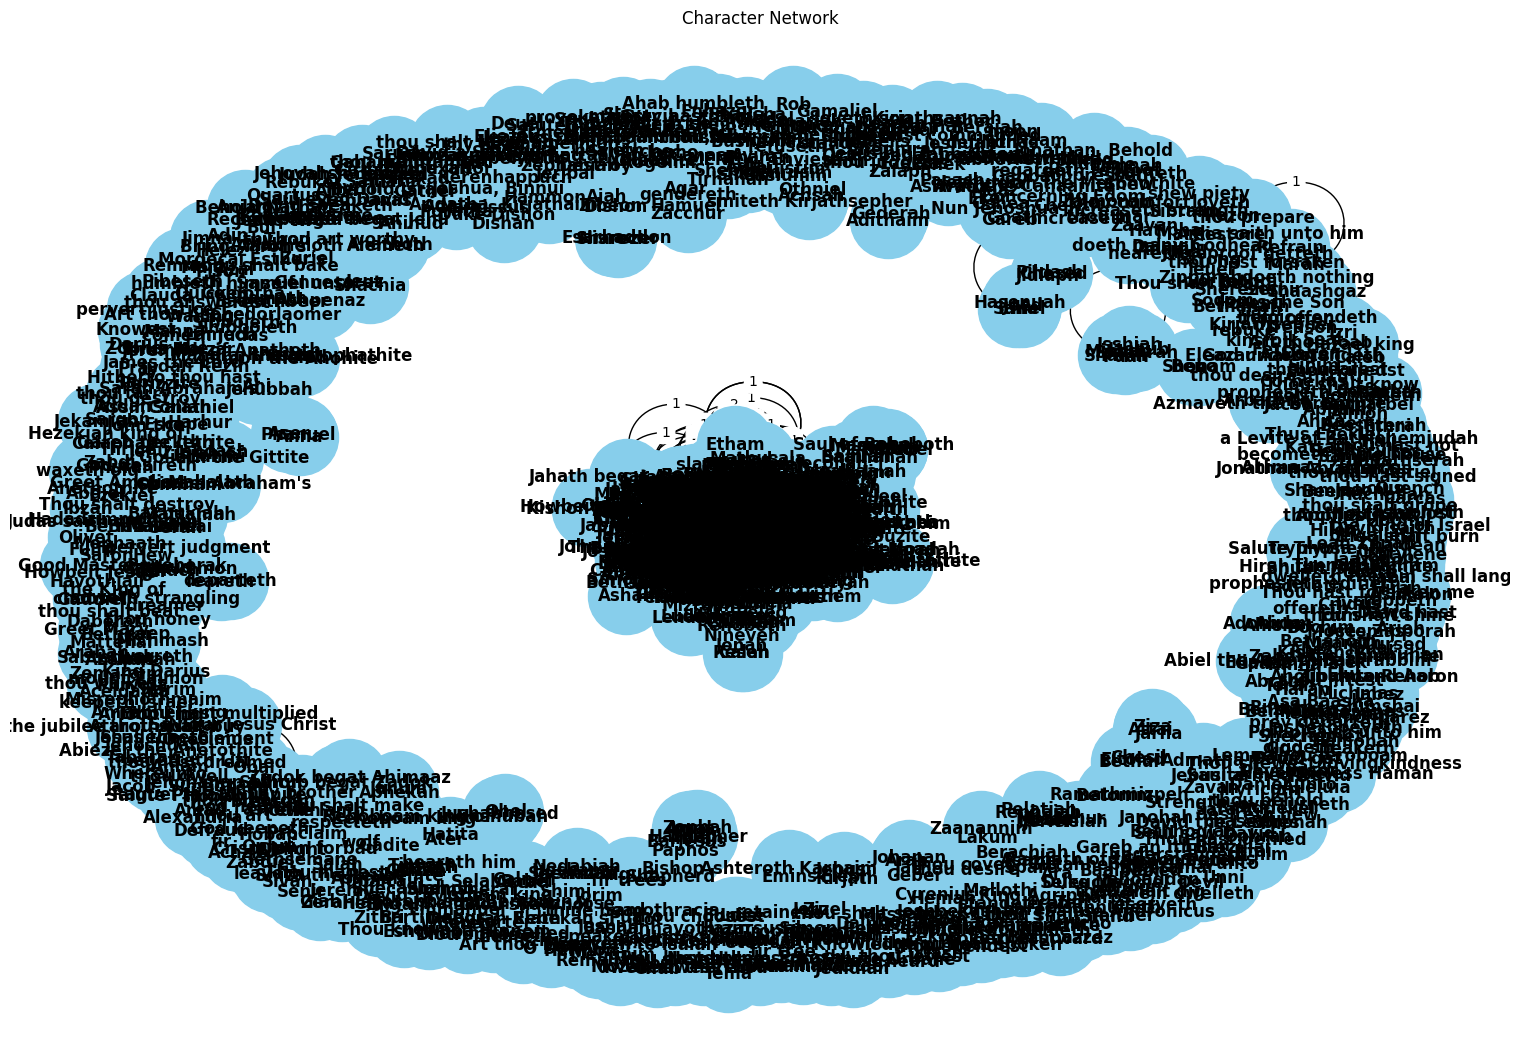

In [ ]:
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, seed=42)  # Positioning nodes using spring layout algorithm
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_weight="bold")
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Character Network")
plt.show()

In [ ]:
# Applying the extract_entities function to each text in the 'text' column to extract names
bible['name'] = bible['text'].apply(lambda x: extract_entities(x, 'PERSON'))

# Printing the first few rows of the dataset to verify the new column
print(bible.head())


   Unnamed: 0       id     book  chapter  verse  \
0           0  1001001  Genesis        1      1   
1           1  1001002  Genesis        1      2   
2           2  1001003  Genesis        1      3   
3           3  1001004  Genesis        1      4   
4           4  1001005  Genesis        1      5   

                                                text   name  
0  In the beginning God created the heaven and th...     []  
1  And the earth was without form, and void; and ...     []  
2  And God said, Let there be light: and there wa...  [God]  
3  And God saw the light, that it was good: and G...     []  
4  And God called the light Day, and the darkness...  [God]  


In [ ]:
bible.to_csv('data_with_names.csv')

In [ ]:
person_list=[i for item in bible['name'].tolist() for i in item]

In [ ]:
person_list

['God',
 'God',
 'God',
 'God',
 'God',
 'God',
 'God',
 'God',
 'God',
 'Behold',
 'Pison',
 'Gihon',
 'Hiddekel',
 'thou shalt',
 'Adam',
 'Adam',
 'Adam',
 'Adam',
 'Adam',
 'Adam',
 'Adam',
 'Adam',
 'thy head',
 'Adam',
 'Thou',
 'Adam',
 'Eve',
 'Adam',
 'Behold',
 'Adam',
 'Cain',
 'Abel',
 'Abel',
 'Cain',
 'Cain',
 'Abel',
 'Abel',
 'Cain',
 'Cain',
 'Cain',
 'Cain',
 'Abel',
 'Cain',
 'Abel',
 'Cain',
 'Abel',
 'Cain',
 'findeth',
 'slayeth Cain',
 'Cain',
 'Cain',
 'Cain',
 'Enoch',
 'Enoch',
 'Enoch',
 'Irad',
 'Mehujael',
 'Mehujael',
 'Methusael',
 'Methusael',
 'Lamech',
 'Jabal',
 'Jubal',
 'Tubalcain',
 'Cain',
 'Adam',
 'Seth',
 'Abel',
 'Cain',
 'Seth',
 'Enos',
 'Adam',
 'Adam',
 'Adam',
 'Seth',
 'Adam',
 'Seth',
 'Adam',
 'Seth',
 'Enos',
 'Seth',
 'Enos',
 'Seth',
 'Enos',
 'Enoch',
 'Enoch',
 'Methuselah',
 'Enoch',
 'Methuselah',
 'Enoch',
 'Methuselah',
 'Methuselah',
 'Noah',
 'Noah',
 'Noah',
 'Noah',
 'Japheth',
 'Noah',
 'Noah',
 'Noah',
 'Noah',
 'Noah',


In [ ]:
def plot_wordcloud(docx):
  my_wordcloud=WordCloud().generate(docx)
  plt.imshow(my_wordcloud,interpolation="bilinear")
  plt.axis("off")
  plt.show()

In [ ]:
"".join(person_list)

"GodGodGodGodGodGodGodGodGodBeholdPisonGihonHiddekelthou shaltAdamAdamAdamAdamAdamAdamAdamAdamthy headAdamThouAdamEveAdamBeholdAdamCainAbelAbelCainCainAbelAbelCainCainCainCainAbelCainAbelCainAbelCainfindethslayeth CainCainCainCainEnochEnochEnochIradMehujaelMehujaelMethusaelMethusaelLamechJabalJubalTubalcainCainAdamSethAbelCainSethEnosAdamAdamAdamSethAdamSethAdamSethEnosSethEnosSethEnosEnochEnochMethuselahEnochMethuselahEnochMethuselahMethuselahNoahNoahNoahNoahJaphethNoahNoahNoahNoahNoahJaphethNoahNoahNoahthou shaltNoahNoahNoahNoahNoahNoahNoahShemHamJaphethNoahNoahNoahNoahNoahNoahNoahNoahNoahNoahNoahNoahNoahGodNoahNoahJaphethHamNoahNoahShemJaphethNoahJaphethNoahNoahNoahJaphethJaphethGomerMagogJavanGomerAshkenazElishahKittimDodanimCushMizraimSabtechahCushNimrodBabelAccadCalnehAsshurNinevehRehobothResenNinevehCalahMizraimLudimLehabimPathrusimCasluhimPhilistimHethGirgasitethou goestLashaEberJaphethAsshurGetherEberEberPelegJerahHadoramUzalObalJobabthou goestSepharNoahBeholdShemArphaxadEberS

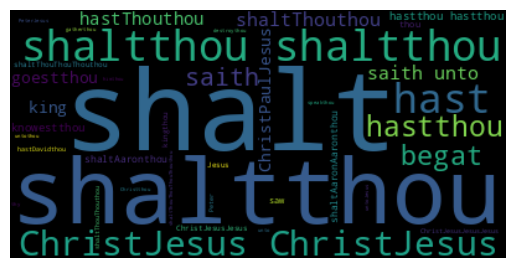

In [ ]:
plot_wordcloud("".join(person_list))

In [ ]:
from collections import Counter

#Finding the most commonly used names in the texts
common_names = Counter(person_list).most_common(10)

print("Top 10 most common names:")
for name, count in common_names:
    print(f"{name}: {count}")


Top 10 most common names:
David: 1012
Jesus: 706
Thou: 393
Saul: 369
Jacob: 358
Aaron: 346
Behold: 316
Solomon: 282
Babylon: 262
thou shalt: 249


In [ ]:
common_names_counter = Counter(person_list)
common_names = common_names_counter.most_common(10)

bible_names = pd.DataFrame(common_names, columns=['names', 'counts'])

In [ ]:
import plotly.express as pex
pex.bar(bible_names,x="names",y="counts")
clean_bible=bible

In [ ]:
def get_relationship(bible, window_size=5, entity_columns="person"):
    relationships = []

    for i in range(len(bible) - window_size + 1):
        char_list = sum((bible.loc[i:i+window_size-1, entity_columns]), [])

        char_unique = [char_list[i] for i in range(len(char_list)) if (i == 0) or (char_list[i] != char_list[i-1])]

        if len(char_unique) > 1:
            for idx, a in enumerate(char_unique[:-1]):
                b = char_unique[idx + 1]
                relationships.append({"source": a, "destination": b})

    return relationships

# Applying the lambda function to extract first names from 'name' column
bible["person"] = bible["name"].apply(lambda x: [item.split()[0] for item in x])

# Calling the get_relationship function
relationships_bible = get_relationship(bible)
relationships_bible


[{'source': 'God', 'destination': 'Behold'},
 {'source': 'God', 'destination': 'Behold'},
 {'source': 'Pison', 'destination': 'Gihon'},
 {'source': 'Pison', 'destination': 'Gihon'},
 {'source': 'Gihon', 'destination': 'Hiddekel'},
 {'source': 'Pison', 'destination': 'Gihon'},
 {'source': 'Gihon', 'destination': 'Hiddekel'},
 {'source': 'Gihon', 'destination': 'Hiddekel'},
 {'source': 'Gihon', 'destination': 'Hiddekel'},
 {'source': 'Hiddekel', 'destination': 'thou'},
 {'source': 'Hiddekel', 'destination': 'thou'},
 {'source': 'thou', 'destination': 'Adam'},
 {'source': 'thou', 'destination': 'Adam'},
 {'source': 'thou', 'destination': 'Adam'},
 {'source': 'thy', 'destination': 'Adam'},
 {'source': 'Adam', 'destination': 'Thou'},
 {'source': 'thy', 'destination': 'Adam'},
 {'source': 'Adam', 'destination': 'Thou'},
 {'source': 'thy', 'destination': 'Adam'},
 {'source': 'Adam', 'destination': 'Thou'},
 {'source': 'Adam', 'destination': 'Thou'},
 {'source': 'Thou', 'destination': 'Adam'},

In [ ]:
#Storing the source and destination column values in a seprate dataframe
relationships_bible=pd.DataFrame(relationships_bible)
relationships_bible

,source,destination
0,God,Behold
1,God,Behold
2,Pison,Gihon
3,Pison,Gihon
4,Gihon,Hiddekel
...,...,...
40142,David,heareth
40143,Jesus,David
40144,David,heareth
40145,heareth,Jesus


In [ ]:
import plotly.graph_objects as go

relationship_graph = nx.from_pandas_edgelist(
    relationships_bible,
    source="source",
    target="destination",
    create_using=nx.Graph()
)

pos = nx.spring_layout(relationship_graph, iterations=10)

# Creating a list of node positions
node_x = []
node_y = []
for node in pos:
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode="markers",
    hoverinfo="text",
    marker=dict(
        size=10,
        color="blue"
    ),
    text=list(relationship_graph.nodes())
)

edge_x = []
edge_y = []
for edge in relationship_graph.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=1, color="#888"),
    hoverinfo="none",
    mode="lines"
)

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title="Relationship Graph",
                    titlefont_size=16,
                    showlegend=False,
                    hovermode="closest",
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
                ))

fig.show()

In [ ]:
average_degree = sum(dict(nx.degree(relationship_graph)).values()) / len(relationship_graph)

print("Average degree of nodes:", average_degree)

Average degree of nodes: 5.764411027568922


In [ ]:
#  Centrality Analysis

import networkx as nx

centrality_measures = nx.degree_centrality(relationship_graph)

for node, centrality in centrality_measures.items():
    print(f"Node {node}: Centrality {centrality}")


Node God: Centrality 0.016300940438871474
Node Behold: Centrality 0.09592476489028214
Node Pison: Centrality 0.0006269592476489029
Node Gihon: Centrality 0.005015673981191223
Node Hiddekel: Centrality 0.0018808777429467085
Node thou: Centrality 0.09905956112852665
Node Adam: Centrality 0.00877742946708464
Node thy: Centrality 0.0018808777429467085
Node Thou: Centrality 0.07586206896551724
Node Eve: Centrality 0.0006269592476489029
Node Cain: Centrality 0.005015673981191223
Node Abel: Centrality 0.005642633228840126
Node findeth: Centrality 0.011912225705329155
Node slayeth: Centrality 0.0012539184952978057
Node Enoch: Centrality 0.00438871473354232
Node Irad: Centrality 0.0012539184952978057
Node Mehujael: Centrality 0.0012539184952978057
Node Methusael: Centrality 0.0012539184952978057
Node Lamech: Centrality 0.0012539184952978057
Node Jabal: Centrality 0.0012539184952978057
Node Jubal: Centrality 0.0012539184952978057
Node Tubalcain: Centrality 0.0012539184952978057
Node Seth: Centra

In [ ]:

centrality_measures = nx.degree_centrality(relationship_graph)

# Finding the node with the highest centrality
highest_centrality_node = max(centrality_measures, key=centrality_measures.get)

# Getting the centrality score of the highest centrality node
highest_centrality_score = centrality_measures[highest_centrality_node]

# Printing the name of the person with the highest centrality and their centrality score
print("Person with highest centrality:", highest_centrality_node)
print("Centrality score:", highest_centrality_score)


Person with highest centrality: David
Centrality score: 0.14984326018808777


In [ ]:
betweenness_centrality = nx.betweenness_centrality(relationship_graph)

# Finding the node with the highest betweenness centrality
most_influential_node = max(betweenness_centrality, key=betweenness_centrality.get)

# Getting the betweenness centrality score of the most influential node
most_influential_score = betweenness_centrality[most_influential_node]

# Printing the name of the most influential character and their betweenness centrality score
print("Most influential character:", most_influential_node)
print("Betweenness centrality score:", most_influential_score)


Most influential character: David
Betweenness centrality score: 0.24087074387906435


In [ ]:

edge_betweenness = nx.edge_betweenness_centrality(relationship_graph)

# Finding the edge with the highest edge betweenness centrality
most_important_edge = max(edge_betweenness, key=edge_betweenness.get)

# Getting the edge betweenness centrality score of the most important edge
most_important_score = edge_betweenness[most_important_edge]

# Printing the most important connection and its edge betweenness centrality score
print("Most important connection:", most_important_edge)
print("Edge betweenness centrality score:", most_important_score)



Most important connection: ('David', 'Jesus')
Edge betweenness centrality score: 0.02418370730565293


In [ ]:


# Printting the name of the best betweener and their betweenness centrality score
print("Best betweener:", most_influential_node)
print("Betweenness centrality score:", best_betweener_score)


Best betweener: David
Betweenness centrality score: 0.24087074387906435


Enter the name of the first character: Lois
Enter the name of the second character: Luke


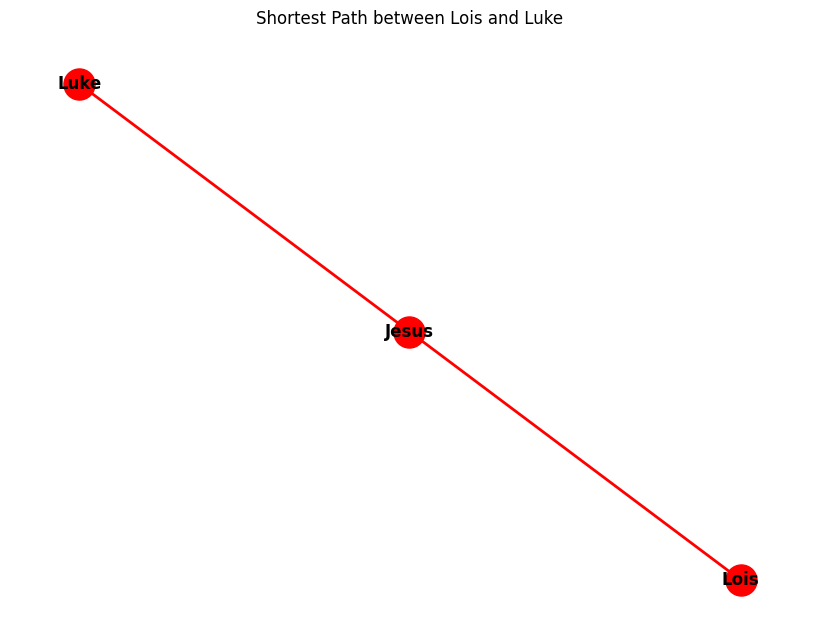

Shortest path between Lois and Luke: ['Lois', 'Jesus', 'Luke']


In [ ]:
# Cell 7: Finding Shortest Path between Two Characters



# Function to find and visualize the shortest path between two characters
def find_shortest_path(graph, character1, character2):
    try:
        # Finding the shortest path between the two characters
        shortest_path = nx.shortest_path(graph, source=character1, target=character2)

        # Creating a subgraph containing only the nodes and edges along the shortest path
        shortest_path_edges = [(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)]
        shortest_path_graph = nx.Graph()
        shortest_path_graph.add_nodes_from(shortest_path)
        shortest_path_graph.add_edges_from(shortest_path_edges)

        # Visualizing the shortest path
        plt.figure(figsize=(8, 6))
        pos = nx.spring_layout(shortest_path_graph)
        nx.draw(shortest_path_graph, pos, with_labels=True, font_weight='bold', node_color='r', node_size=500, edge_color='r', width=2)
        plt.title("Shortest Path between {} and {}".format(character1, character2))
        plt.show()

        return shortest_path

    except nx.NetworkXNoPath:
        print("No path found between {} and {}".format(character1, character2))
        return None

# user input
character1 = input("Enter the name of the first character: ")
character2 = input("Enter the name of the second character: ")

shortest_path = find_shortest_path(relationship_graph, character1, character2)
print("Shortest path between {} and {}: {}".format(character1, character2, shortest_path))


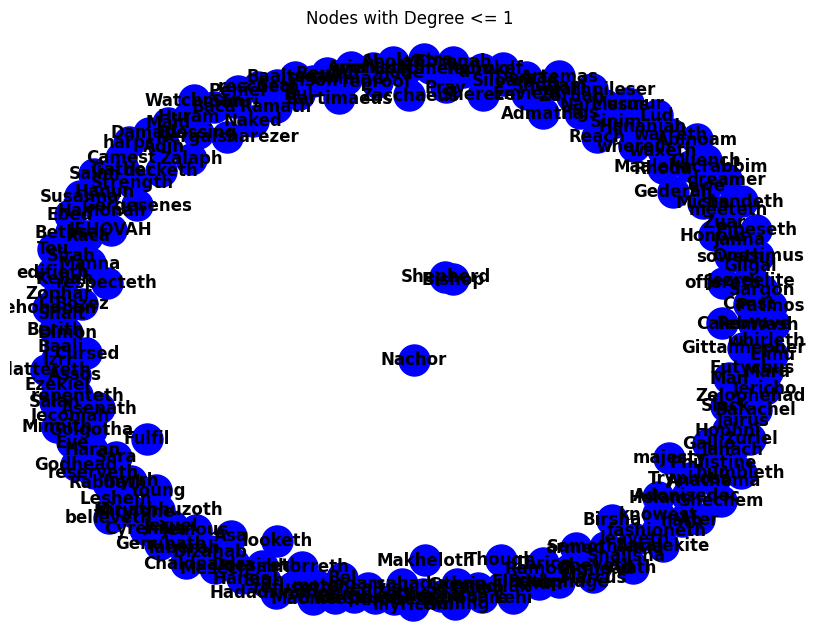

Nodes with degree <= 1: ['Pison', 'Eve', 'Salah', 'Haran', 'Birsha', 'Jegarsahadutha', 'meeteth', 'Peniel', 'Shechem', 'Asenath', 'Fulfil', 'JEHOVAH', 'Manna', 'Jealous', 'offereth', 'Zuar', 'Zuriel', 'Taberah', 'Enviest', 'Caleb', 'Kirjathhuzoth', 'Shuham', 'Makheloth', 'Ebronah', 'Dizahab', 'dreamer', 'refuseth', 'Gilgal', 'Jericho', 'Adonizedec', 'Slack', 'Maalehacrabbim', 'Gederah', 'Ramath', 'Gittahhepher', 'Leshem', 'Tanach', 'Nachor', 'Abinoam', 'Ebed', 'Berith', 'Maonites', 'Minnith', 'Lehi', 'a', 'Baaltamar', 'Mara', 'Hophni', 'Bethcar', 'Shalisha', 'Bozez', 'Strength', 'Philistine', 'Keilah', 'Amalekite', 'Sirah', 'Shalt', 'Micha', 'Hanun', 'Helam', 'Camest', 'ewe', 'Bul', 'harps', 'Genubath', 'Zeruah', 'Asa', 'Jezreelite', 'Wash', 'Ramothgilead', 'Arieh', 'Tiglathpileser', 'Dara', 'Zelophehad', 'Eladah', 'Chun', 'Tou', 'Izri', 'Simri', 'Huram', 'Jehohanan', 'Jeruel', 'Ater', 'Shealtiel', 'Zalaph', 'Chephirah', 'Adin', 'Admatha', 'Naked', 'Zophar', 'Barachel', 'Elihu', 'abhor

In [ ]:


# Function to find and visualize nodes with degree <= 1
def visualize_low_degree_nodes(graph):
    low_degree_nodes = [node for node, degree in dict(graph.degree()).items() if degree <= 1]

    # Creating a subgraph containing only the low degree nodes
    low_degree_graph = graph.subgraph(low_degree_nodes)

    # Visualizing the low degree nodes
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(low_degree_graph)
    nx.draw(low_degree_graph, pos, with_labels=True, font_weight='bold', node_color='b', node_size=500)
    plt.title("Nodes with Degree <= 1")
    plt.show()

    return low_degree_nodes

low_degree_nodes = visualize_low_degree_nodes(relationship_graph)
print("Nodes with degree <= 1:", low_degree_nodes)


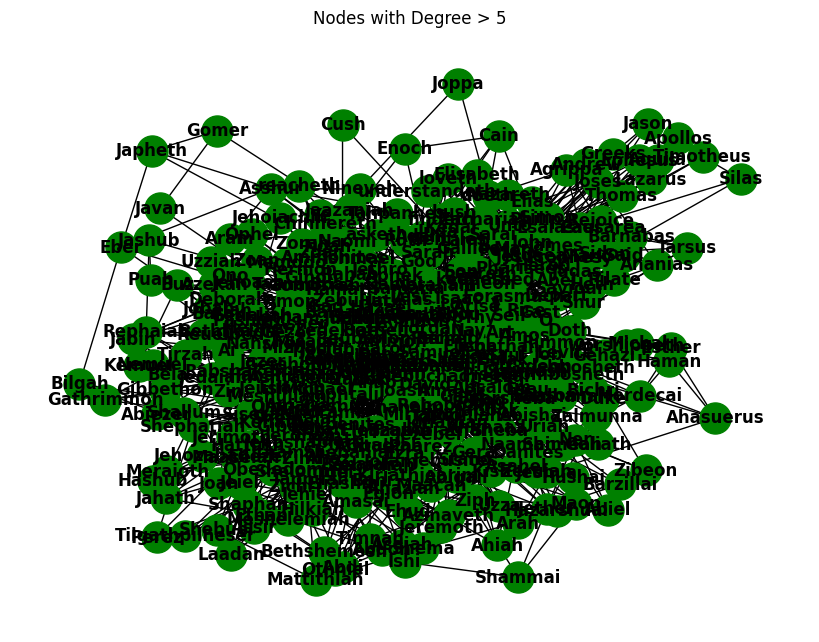

Nodes with degree > 5: ['God', 'Behold', 'Gihon', 'thou', 'Adam', 'Thou', 'Cain', 'Abel', 'findeth', 'Enoch', 'Noah', 'Japheth', 'Gomer', 'Javan', 'Cush', 'Asshur', 'Nineveh', 'Heth', 'Eber', 'Jobab', 'Sarai', 'Bethel', 'Pharaoh', 'Gomorrah', 'Zoar', 'Bela', 'Dan', 'Unto', 'Shur', 'Ishmael', 'Abraham', 'Sarah', 'Shall', 'Isaac', 'Arise', 'Moab', 'Ammon', 'Said', 'Cast', 'Beersheba', 'Buz', 'Kemuel', 'Kedar', 'Jacob', 'Lest', 'Esau', 'Art', 'Thy', 'Rachel', 'Lo', 'Bilhah', 'Reuben', 'Simeon', 'Naphtali', 'Gad', 'Asher', 'Zebulun', 'Joseph', 'Mizpah', 'Mahanaim', 'asketh', 'Jabbok', 'Nay', 'Seir', 'Deborah', 'Benjamin', 'Levi', 'Reuel', 'Jeush', 'Korah', 'Duke', 'Amalek', 'Edom', 'Zibeon', 'Saul', 'Baalhanan', 'Timnah', 'Elah', 'Judah', 'Tamar', 'Pharez', 'Forasmuch', 'Shaul', 'Kohath', 'Job', 'Ephraim', 'Gera', 'Naaman', 'Zidon', 'Jordan', 'Machir', 'Puah', 'Moses', 'Gershom', 'Jethro', 'bush', 'Aaron', 'Levite', 'Zichri', 'Ithamar', 'Assir', 'Eleazar', 'Rise', 'Miriam', 'heareth', 'Jos

In [ ]:


# Function to find and visualize nodes with degree > 5
def visualize_high_degree_nodes(graph):
    high_degree_nodes = [node for node, degree in dict(graph.degree()).items() if degree > 5]

    # Creating subgraph containing only the high degree nodes
    high_degree_graph = graph.subgraph(high_degree_nodes)

    # Visualizing the high degree nodes
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(high_degree_graph)
    nx.draw(high_degree_graph, pos, with_labels=True, font_weight='bold', node_color='g', node_size=500)
    plt.title("Nodes with Degree > 5")
    plt.show()

    return high_degree_nodes

high_degree_nodes = visualize_high_degree_nodes(relationship_graph)
print("Nodes with degree > 5:", high_degree_nodes)


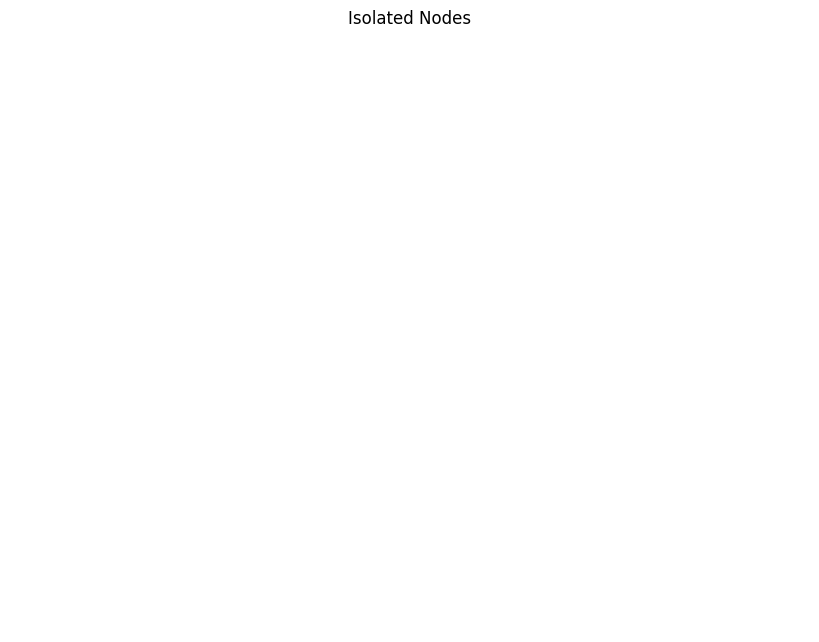

Isolated nodes: []


In [ ]:


# Function to find and visualize isolated nodes
def visualize_isolated_nodes(graph):
    isolated_nodes = [node for node, degree in dict(graph.degree()).items() if degree == 0]

    # Creating subgraph containing only the isolated nodes
    isolated_graph = graph.subgraph(isolated_nodes)

    # Visualizing the isolated nodes
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(isolated_graph)
    nx.draw(isolated_graph, pos, with_labels=True, font_weight='bold', node_color='y', node_size=500)
    plt.title("Isolated Nodes")
    plt.show()

    return isolated_nodes

isolated_nodes = visualize_isolated_nodes(relationship_graph)
print("Isolated nodes:", isolated_nodes)


In [ ]:
pip install python-louvain

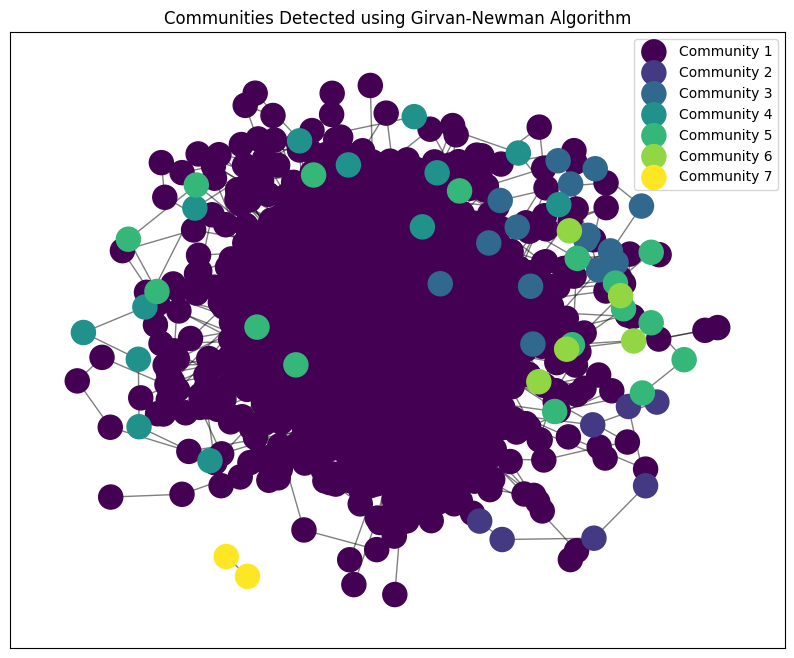

Number of communities detected: 7


In [ ]:
from networkx.algorithms.community import girvan_newman

# Converting DataFrame to a NetworkX graph
G = nx.from_pandas_edgelist(
    relationships_bible,
    source='source',
    target='destination',
    create_using=nx.Graph()
)

# Function to detect communities using the Girvan-Newman algorithm
def detect_communities_girvan_newman(graph, k):
    communities = girvan_newman(graph)
    limited = tuple(sorted(c) for c in next(communities))
    for _ in range(k-1):
        limited = tuple(sorted(c) for c in next(communities))
    return limited

# Function to visualize communities
def visualize_communities(graph, communities):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(graph, k=0.1)
    colors = plt.get_cmap('viridis', len(communities))
    for i, community in enumerate(communities):
        nx.draw_networkx_nodes(graph, pos, nodelist=community, node_size=300, node_color=[colors(i)]*len(community), label=f'Community {i+1}')
    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    plt.legend()
    plt.title("Communities Detected using Girvan-Newman Algorithm")
    plt.show()

# Detecting and visualizing communities
k = 5  # Number of communities to detect
communities = detect_communities_girvan_newman(G, k)
visualize_communities(G, communities)

# Print the number of communities
print("Number of communities detected:", len(communities))


In [ ]:
# Printing members of each community
for i, community in enumerate(communities):
    print(f"Community {i+1}:")
    print(", ".join(community))
    print()


Community 1:
Aaron, Abba, Abda, Abdi, Abdiel, Abdon, Abednego, Abel, Abelbethmaachah, Abelmaim, Abelmeholah, Abez, Abi, Abiah, Abiathar, Abidan, Abiel, Abiezer, Abigail, Abihud, Abijah, Abijam, Abimelech, Abinadab, Abinoam, Abishag, Abishai, Abishur, Abraham, Abram, Absalom, Aceldama, Achbor, Achsa, Achsah, Achzib, Adalia, Adam, Addan, Addar, Ader, Adiel, Adin, Adino, Adithaim, Adlai, Admatha, Adna, Adonijah, Adoniram, Adonizedec, Adoraim, Adoram, Adriel, Adullam, Aeneas, Agar, Agrippa, Ah, Aha, Ahab, Ahab,, Aharah, Aharhel, Ahasuerus, Ahaz, Ahaziah, Ahiah, Ahiam, Ahihud, Ahimaaz, Ahiman, Ahira, Ahiram, Ahisamach, Ahishar, Ahithophel, Ahitub, Ahoah, Aholah, Aholiab, Ahuzam, Ai, Aiath, Aija, Ain, Ajah, Alameth, Alas, Alemeth, Alexandria, Alleluia, Allon, Almon, Almondiblathaim, Alphaeus, Alvah, Amad, Amalek, Amalekite, Amariah, Amasai, Amaziah, Ami, Ammiel, Ammihud, Ammon, Ammonites, Amnon, Amon, Amos, Amoz, Amram, Amraphel, Anab, Anani, Ananiah, Ananias, Anathema, Anathoth, Andrew, Ane

In [ ]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)


# Finding least influential characters based on degree centrality
least_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1])

# Finding least influential characters based on betweenness centrality
least_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1])

# Finding least influential characters based on closeness centrality
least_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1])

# Printing the least influential characters
print("Least Influential Characters based on Degree Centrality:")
for char, centrality in least_degree_centrality[:10]:
    print(f"{char}: {centrality}")

print("\nLeast Influential Characters based on Betweenness Centrality:")
for char, centrality in least_betweenness_centrality[:10]:
    print(f"{char}: {centrality}")

print("\nLeast Influential Characters based on Closeness Centrality:")
for char, centrality in least_closeness_centrality[:10]:
    print(f"{char}: {centrality}")


Least Influential Characters based on Degree Centrality:
Pison: 0.0006269592476489029
Eve: 0.0006269592476489029
Salah: 0.0006269592476489029
Haran: 0.0006269592476489029
Birsha: 0.0006269592476489029
Jegarsahadutha: 0.0006269592476489029
meeteth: 0.0006269592476489029
Peniel: 0.0006269592476489029
Shechem: 0.0006269592476489029
Asenath: 0.0006269592476489029

Least Influential Characters based on Betweenness Centrality:
Pison: 0.0
thy: 0.0
Eve: 0.0
slayeth: 0.0
Enos: 0.0
Methuselah: 0.0
Ham: 0.0
Sabtechah: 0.0
Resen: 0.0
Obal: 0.0

Least Influential Characters based on Closeness Centrality:
Shepherd: 0.0006269592476489029
Bishop: 0.0006269592476489029
Ramath: 0.08966425314680966
Baalathbeer: 0.09850188879624756
Imna: 0.09857512440130053
Amal: 0.09857512440130053
Suah: 0.10640733733527225
Remmon: 0.10925714241429685
Zophah: 0.10935476718929073
Harnepher: 0.11889123507973327


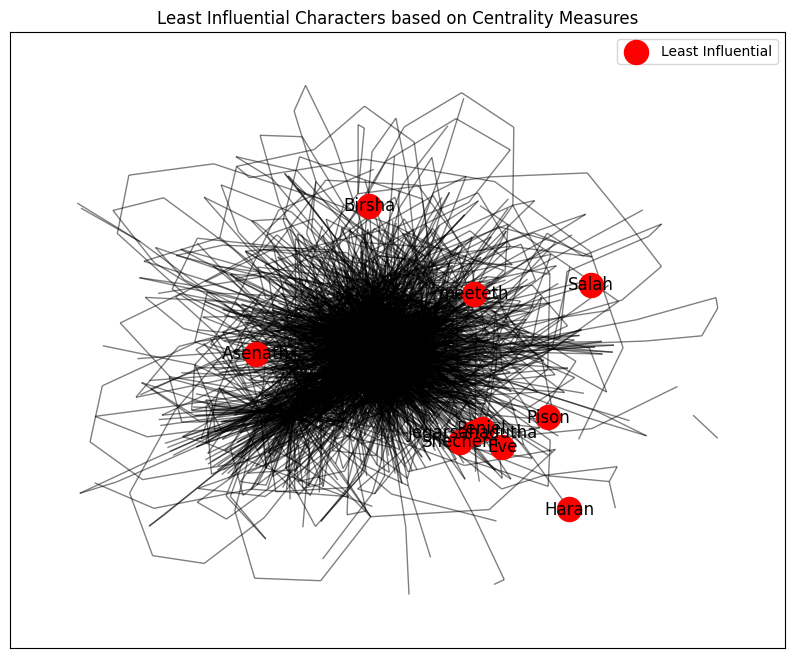

In [ ]:
def visualize_least_influential(graph, least_centrality):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(graph, k=0.1)
    least_nodes = [char for char, _ in least_centrality[:10]]
    nx.draw_networkx_nodes(graph, pos, nodelist=least_nodes, node_size=300, node_color='red', label='Least Influential')
    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    nx.draw_networkx_labels(graph, pos, labels={node: node for node in least_nodes})
    plt.legend()
    plt.title("Least Influential Characters based on Centrality Measures")
    plt.show()

# Visualizing the least influential characters
visualize_least_influential(G, least_degree_centrality)